# Final Project: Analyzing Stock Performance and Building a Dashboard

## Table of Content
- Assignment Background
- Importing stock data for Tesla using yfinance
- Importing Tesla revenue using webscraping
- Importing Gamestop stock Data Using yfinance
- Importing Gamestop Revenue Using Webscraping
- Showing the Dashboards (Graphs) with Tesla Stock Price and Revenue
- Showing the Dashboards (Graphs) with Gamestop Stock Price and Revenue

In [394]:
# First we install all the packages needed to be sure.
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

In [5]:
# Next We import the necesarry libraries.
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

### Assignment Background

For this project, I will assume the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. My job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data you will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are Tesla, Amazon, AMD, and GameStop.

Dashboard Analytics Displayed
A dashboard often provides a view of key performance indicators in a clear way. Analyzing a data set and extracting key performance indicators will be practiced. Prompts will be used to support learning in accessing and displaying data in dashboards. Learning how to display key performance indicators on a dashboard will be included in this assignment. We will be using Plotly in this course for data visualization and is not a requirement to take this course.

### Question 1: Extracting Tesla Stock Data Using yfinance

In [36]:
# We get this data directly from the yfinance library
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace = True)
# To check if we indeed retreived the data we display the first 5 rows. 
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Extracting Tesla Revenue Data Using Webscraping

In [10]:
# First we get the website where we want to scrap from and parse it to a text (string)
url = "https://companiesmarketcap.com/tesla/revenue/"
page = requests.get(url).text
# Then we put the text in BeautifulSoup to parse it
soup = BeautifulSoup(page, "html.parser")
# To check if we have the right data we return the title
soup.find_all("title")


[<title>Tesla (TSLA) - Revenue</title>]

In [11]:
# Now we place the data into a Dataframe
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    # 'tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)'
    # the course gives this code to add data to the dataframe but since pandas 1.4 'append' in dataframe is deprecated...
    # so we need other code...The Stackoverflow community came with the following suggestion: 
    web_data = pd.DataFrame({"Date":[date], "Revenue":[revenue]})
    tesla_revenue = pd.concat([tesla_revenue, web_data], ignore_index=True)
    
#to Check if the code worked we display the first 5 rows of the table.
tesla_revenue.head()

,Date,Revenue
0,2023 (TTM),$95.92 B
1,2022,$81.46 B
2,2021,$53.82 B
3,2020,$31.53 B
4,2019,$24.57 B


In [12]:
# Next we remove punctuation marks, other string values,
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$","").str.replace("B","")
tesla_revenue["Date"] = tesla_revenue["Date"].str.replace("(TTM)","")
# and NaN values so we can use the numbers later on for the graph.
tesla_revenue.dropna(inplace = True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]


In [37]:
# To Check if we have the right Data we return the first 5 rows
tesla_revenue.tail()

,Date,Revenue
4,2019-01-01 00:00:00+00:00,24.57
3,2020-01-01 00:00:00+00:00,31.53
2,2021-01-01 00:00:00+00:00,53.82
1,2022-01-01 00:00:00+00:00,81.46
0,2023-01-01 00:00:00+00:00,95.92


### Question 3: Extracting Gamestop Data Using yfinance

In [17]:
# We repeat the same steps as above for Gamestop directly from the yfinance library
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace = True)
# To check if we indeed retreived the data we display the first 5 rows. 
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Extracting Gamestop Revenue Data Using Webscraping

In [18]:
# We do the same as above
url = "https://stockanalysis.com/stocks/gme/revenue/"
page = requests.get(url).text
# Then we put the text in BeautifulSoup to parse it
soup = BeautifulSoup(page, "html.parser")
# To check if we have the right data we return the title
soup.find_all("title")

[<title>GameStop Revenue 1998-2023 - Stock Analysis</title>]

In [20]:
# Now we place the data into a Dataframe
gme_revenue = pd.DataFrame(columns = ["Date", "Revenue"])

for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    # 'tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)'
    # the course gives this code to add data to the dataframe but since pandas 1.4 append in dataframe is deprecated...
    # so we need other code...The Stackoverflow community came with the following suggestion: 
    web_data = pd.DataFrame({"Date":[date], "Revenue":[revenue]})
    gme_revenue = pd.concat([gme_revenue, web_data], ignore_index=True)

# The years 1998-2001 the revenue was in the millions and after that billions. 
# For consistency and to not modify the data too much for this assignment I drop these years from the dataframe 
last_3_rows_index = gme_revenue.index[-3:]
gme_revenue = gme_revenue.drop(last_3_rows_index)
#to Check if the code worked we display the first 5 rows of the table.
gme_revenue.tail()

,Date,Revenue
17,"Jan 28, 2006",3.09B
18,"Jan 31, 2005",1.84B
19,"Jan 31, 2004",1.58B
20,"Jan 31, 2003",1.35B
21,"Jan 31, 2002",1.12B


In [21]:
# Next we remove punctuation marks, other string values,
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$","")
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("B","")
gme_revenue["Date"] = gme_revenue["Date"].str.split(",").str.get(1)
gme_revenue.dropna(inplace = True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

In [22]:
gme_revenue.tail()

,Date,Revenue
17,2006,3.09
18,2005,1.84
19,2004,1.58
20,2003,1.35
21,2002,1.12


### Question 5: Tesla Stock and Revenue Dashboard

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [332]:
# This is the method to make the graph taken from the course 
# and does not work in this notebook due to functions being deprecated.Do NOT run this code!
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

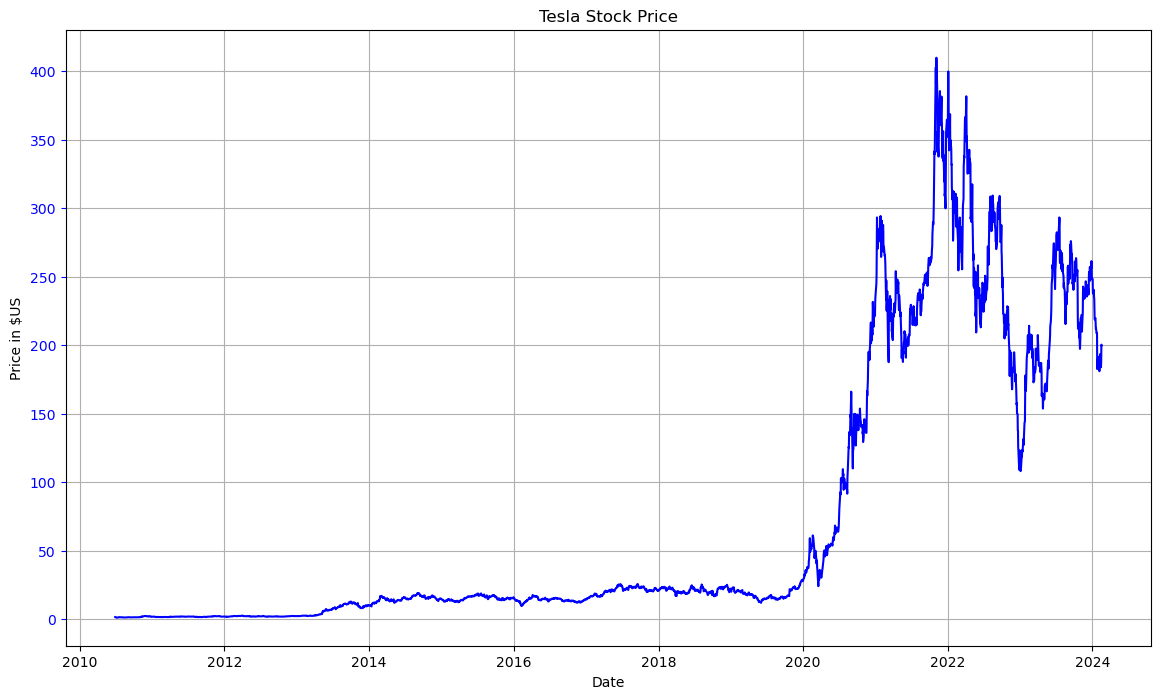

In [24]:
# The method above given by the course does not work with these versions of Jupyter Notebooks and Panda.
# Therefore I have written my own code for creating a graph.

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.plot(tesla_data["Date"],tesla_data["Close"], color="blue", label="Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price in $US")
ax1.tick_params("y", colors="b")
plt.title("Tesla Stock Price")
plt.grid(True)
plt.show()

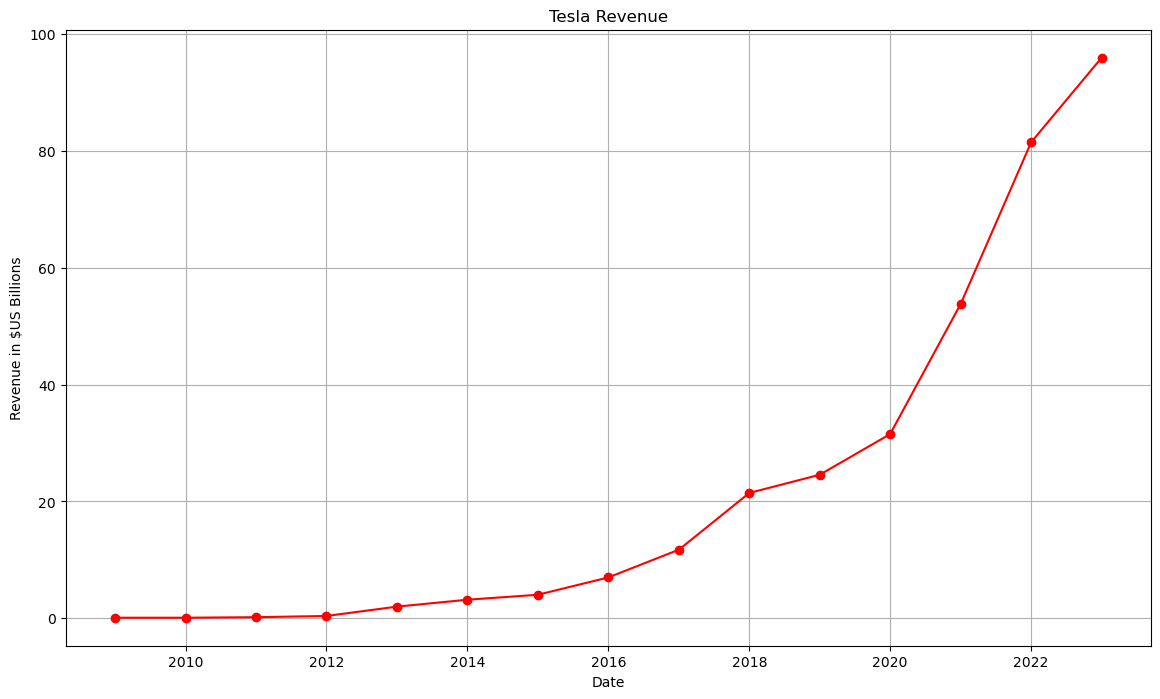

In [35]:
# It turned out the data was not yet sufficiently clean. The data has to be transformed before it can be displayed.
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], format="mixed").dt.tz_localize('UTC')
tesla_revenue = tesla_revenue.sort_values(by='Date')

fig, ax2 = plt.subplots(figsize=(14,8))
ax2.plot(tesla_revenue["Date"],tesla_revenue["Revenue"], marker="o", color="red")
ax2.set_xlabel("Date")
ax2.set_ylabel("Revenue in $US Billions")
ax2.tick_params("both", colors="black")
plt.title("Tesla Revenue")
plt.grid(True)
plt.show()

### Question 6: Gamestop Stock and Revenue Dashboard

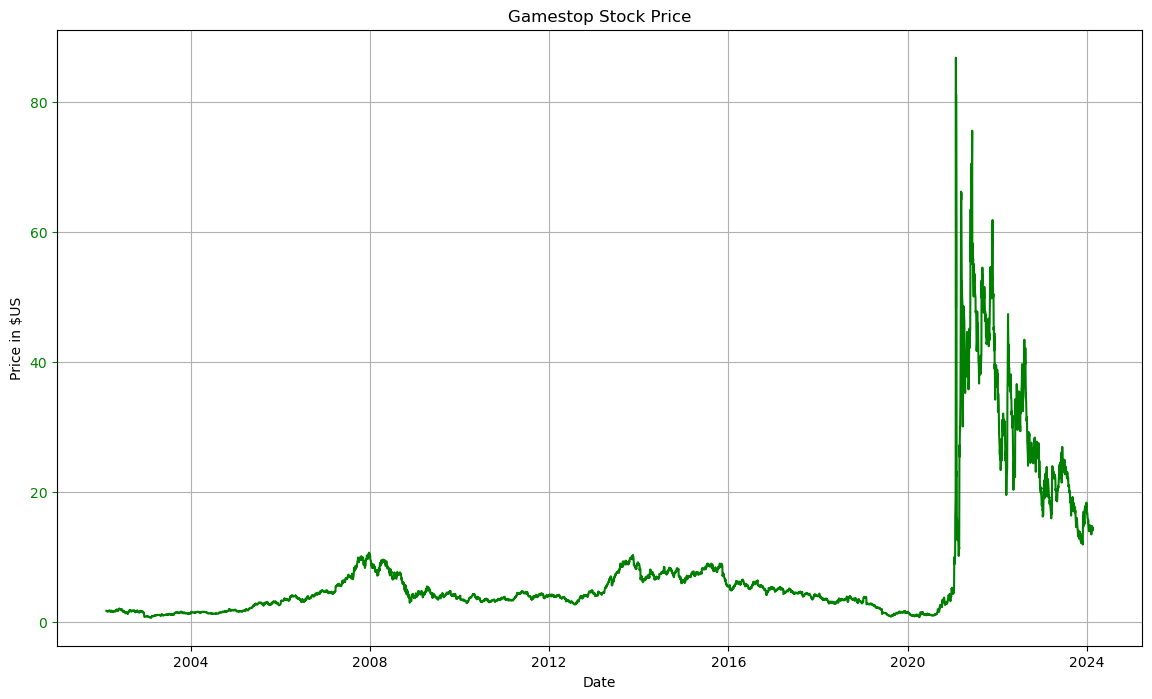

In [32]:
# For Gamestop we do the same and use the same code as with Tesla.
fig, ax3 = plt.subplots(figsize=(14,8))
ax3.plot(gme_data["Date"],gme_data["Close"], color="green", label="Stock Price")
ax3.set_xlabel("Date")
ax3.set_ylabel("Price in $US")
ax3.tick_params("y", colors="green")
plt.title("Gamestop Stock Price")
plt.grid(True)
plt.show()

In [27]:
# As with Tesla, the data did no seem to be completely clean and had to be transformed before it can be displayed.
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], format="ISO8601")
gme_revenue = gme_revenue.sort_values(by='Date')

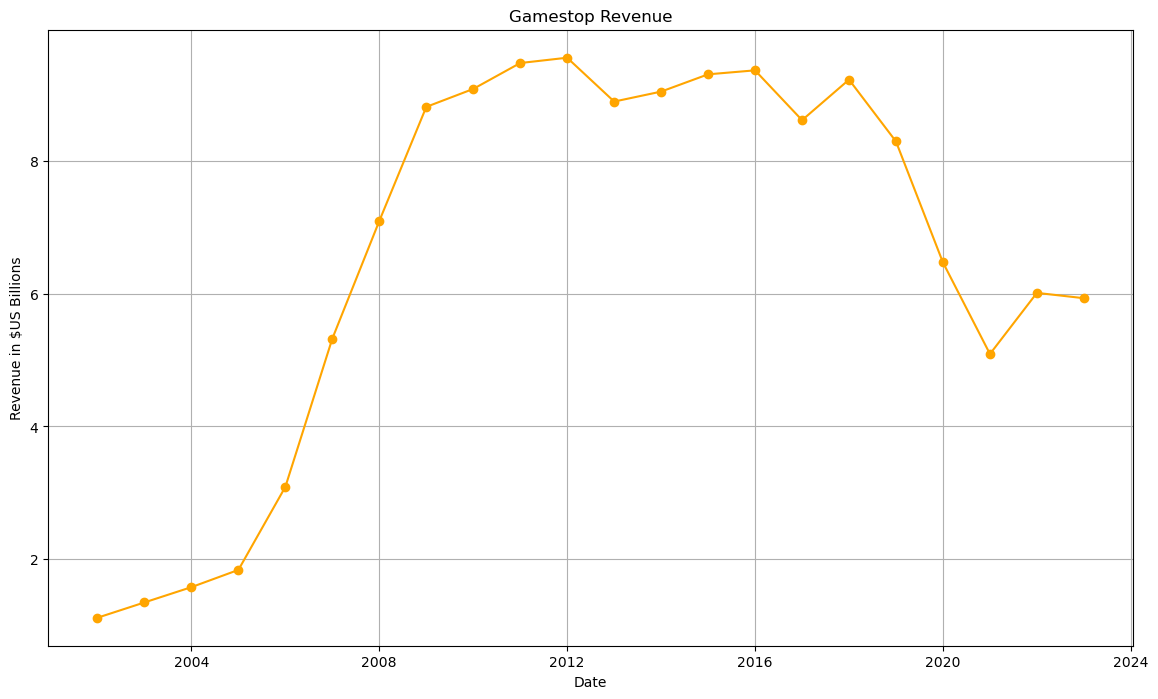

In [28]:


fig, ax4 = plt.subplots(figsize=(14,8))
ax4.plot(gme_revenue["Date"],gme_revenue["Revenue"], marker="o", color="orange")
ax4.set_xlabel("Date")
ax4.set_ylabel("Revenue in $US Billions")
ax4.tick_params("both", colors="black")
plt.title("Gamestop Revenue")
plt.grid(True)
plt.show()

### Trends

For the most part Teslas revenue and stock price move in tandem with an exception of 2022, when Tesla's stock price took a big hit while revenue was still up. AS was the case with Tesla, so did the stock price of Gamestop move more or less in tandem with the anuual revenue until 2020. Revenue was still down but the stock price soared (due to internet activity and market manipulation of sorts). The price then moved into a sharp correction, while revenue enjoyed a small increase.  